Hyper parameter is choosing the best parameters, methods from a machine learning model that works most efficiently along with the model .
There are generally two types of them 
1) Grid Search cv 
2) Randomized search cv 

There are many other too , but for now we will sticks on these two for machine learning ! 

In [301]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix,mean_squared_error,r2_score,classification_report
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
import math
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib

In [233]:
df = pd.read_csv("F:\dataset_for_ML\supervised\chatGptGenerated\customer_churn_dataset.csv")

In [234]:
df.head(10)

,customer_id,account_length,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,...,state,area_code,international_plan,voice_mail_plan,total_minutes,total_calls,total_charges,avg_call_duration,customer_segment,churn
0,CUST_000001,146,1022.91,62,176.38,11.67,98,2.15,47.19,53,...,MO,213.0,no,no,1087.58,253,183.66,4.28,high_maintenance,0
1,CUST_000002,91,469.73,11,79.16,148.48,48,20.82,332.50,8,...,FL,408.0,yes,yes,958.07,83,132.39,11.41,high_maintenance,0
2,CUST_000003,309,132.32,7,25.73,185.93,22,24.74,263.46,18,...,MO,408.0,no,yes,630.84,53,88.22,11.68,regular,1
3,CUST_000004,268,97.21,8,24.14,100.57,5,14.07,279.75,47,...,IL,424.0,no,yes,524.83,70,80.39,7.39,high_value,0
4,CUST_000005,249,327.85,35,54.56,65.84,109,10.69,95.54,71,...,AZ,650.0,yes,no,568.35,219,95.84,2.58,regular,1
5,CUST_000006,14,131.57,60,21.20,77.36,132,10.45,38.29,35,...,AZ,408.0,no,yes,282.68,236,47.43,1.19,regular,0
6,CUST_000007,157,144.89,51,32.53,143.91,109,21.41,247.85,61,...,TN,510.0,no,no,550.98,221,80.05,2.48,high_maintenance,1
7,CUST_000008,170,224.82,8,42.06,143.95,20,17.64,368.92,34,...,VA,562.0,no,no,751.50,78,95.91,NaN,high_value,1
8,CUST_000009,130,682.19,10,113.62,218.57,67,28.79,621.92,65,...,IL,408.0,no,no,1528.54,143,204.15,10.61,high_value,0
9,CUST_000010,38,85.29,32,17.21,180.11,33,23.01,377.75,19,...,WI,323.0,no,no,646.90,103,78.21,6.22,high_value,0


In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             25000 non-null  object 
 1   account_length          25000 non-null  int64  
 2   total_day_minutes       25000 non-null  float64
 3   total_day_calls         25000 non-null  int64  
 4   total_day_charge        25000 non-null  float64
 5   total_eve_minutes       25000 non-null  float64
 6   total_eve_calls         25000 non-null  int64  
 7   total_eve_charge        25000 non-null  float64
 8   total_night_minutes     25000 non-null  float64
 9   total_night_calls       25000 non-null  int64  
 10  total_night_charge      25000 non-null  float64
 11  total_intl_minutes      23750 non-null  float64
 12  total_intl_calls        23750 non-null  float64
 13  total_intl_charge       25000 non-null  float64
 14  customer_service_calls  24500 non-null

In [236]:
df.duplicated().sum()

0

In [237]:
df.isna().sum()/df.shape[0]

customer_id               0.00000
account_length            0.00000
total_day_minutes         0.00000
total_day_calls           0.00000
total_day_charge          0.00000
total_eve_minutes         0.00000
total_eve_calls           0.00000
total_eve_charge          0.00000
total_night_minutes       0.00000
total_night_calls         0.00000
total_night_charge        0.00000
total_intl_minutes        0.05000
total_intl_calls          0.05000
total_intl_charge         0.00000
customer_service_calls    0.02000
monthly_charges           0.03000
state                     0.00000
area_code                 0.02000
international_plan        0.00000
voice_mail_plan           0.03988
total_minutes             0.00000
total_calls               0.00000
total_charges             0.00000
avg_call_duration         0.06000
customer_segment          0.03000
churn                     0.00000
dtype: float64

In [238]:
df_numerical_cols = df.select_dtypes(["int","float"])
df_cate_cols =df.select_dtypes("object")

In [239]:
df_numerical_cols.head(10),df_numerical_cols.shape

(   account_length  total_day_minutes  total_day_calls  total_day_charge  \
 0             146            1022.91               62            176.38   
 1              91             469.73               11             79.16   
 2             309             132.32                7             25.73   
 3             268              97.21                8             24.14   
 4             249             327.85               35             54.56   
 5              14             131.57               60             21.20   
 6             157             144.89               51             32.53   
 7             170             224.82                8             42.06   
 8             130             682.19               10            113.62   
 9              38              85.29               32             17.21   
 
    total_eve_minutes  total_eve_calls  total_eve_charge  total_night_minutes  \
 0              11.67               98              2.15                47.19   


In [240]:
knnImputer = KNNImputer(n_neighbors=5)
df_numerical_cols_imputed = pd.DataFrame(knnImputer.fit_transform(df_numerical_cols),columns=df_numerical_cols.columns)

In [241]:
simpleImputer = SimpleImputer(strategy="most_frequent")
df_cate_cols_imputed = pd.DataFrame(simpleImputer.fit_transform(df_cate_cols),columns=df_cate_cols.columns)

In [242]:
df_imputed = pd.concat([df_cate_cols_imputed,df_numerical_cols_imputed],axis=1)

In [243]:
df_imputed.shape

(25000, 26)

In [244]:
df_imputed.sample(10)

,customer_id,state,international_plan,voice_mail_plan,customer_segment,account_length,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,total_intl_calls,total_intl_charge,customer_service_calls,monthly_charges,area_code,total_minutes,total_calls,total_charges,avg_call_duration,churn
18320,CUST_018321,OH,yes,yes,high_maintenance,121.0,5024.92,31.0,95.59,254.08,...,29.0,6.43,5.0,71.36,323.0,910.73,149.0,144.90,6.07,1.0
8330,CUST_008331,CA,no,no,regular,110.0,413.76,59.0,69.26,109.88,...,23.0,1.71,3.0,61.27,949.0,551.50,159.0,86.17,3.45,1.0
16810,CUST_016811,MD,no,no,regular,469.0,241.67,30.0,42.11,101.71,...,6.0,10.28,3.0,11.91,424.0,558.64,101.0,85.67,5.48,1.0
24259,CUST_024260,NC,no,yes,high_maintenance,607.0,281.97,4.0,53.40,151.77,...,22.0,6.81,5.0,12.50,562.0,848.19,79.0,112.51,10.60,1.0
2095,CUST_002096,TN,no,no,regular,149.0,957.98,22.0,162.48,73.63,...,0.0,2.28,0.0,72.70,714.0,1606.06,150.0,226.18,10.64,0.0
2437,CUST_002438,FL,yes,no,high_value,84.0,220.63,51.0,41.64,89.47,...,35.0,8.51,3.0,130.71,213.0,672.62,168.0,89.38,3.98,0.0
11979,CUST_011980,NC,no,no,high_value,238.0,609.69,49.0,114.83,275.31,...,19.0,12.45,2.0,122.81,408.0,1251.70,84.0,199.09,14.73,1.0
10362,CUST_010363,NC,no,no,regular,419.0,392.03,26.0,67.87,217.69,...,9.0,3.50,0.0,70.91,949.0,1083.15,115.0,138.55,9.34,1.0
6326,CUST_006327,FL,no,yes,high_value,276.0,647.95,12.0,107.57,79.61,...,11.0,5.32,6.0,226.12,714.0,1346.25,204.0,175.09,6.57,0.0
3199,CUST_003200,WA,no,no,high_value,38.0,386.08,6.0,67.82,139.89,...,6.0,4.65,2.0,128.05,408.0,779.94,76.0,113.72,10.13,0.0


In [245]:
df_imputed.isna().sum()

customer_id               0
state                     0
international_plan        0
voice_mail_plan           0
customer_segment          0
account_length            0
total_day_minutes         0
total_day_calls           0
total_day_charge          0
total_eve_minutes         0
total_eve_calls           0
total_eve_charge          0
total_night_minutes       0
total_night_calls         0
total_night_charge        0
total_intl_minutes        0
total_intl_calls          0
total_intl_charge         0
customer_service_calls    0
monthly_charges           0
area_code                 0
total_minutes             0
total_calls               0
total_charges             0
avg_call_duration         0
churn                     0
dtype: int64

In [246]:
df_imputed.drop(columns="customer_id",inplace=True)

In [247]:
df_imputed.select_dtypes(["int","float"]).corr()

,account_length,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,...,total_intl_calls,total_intl_charge,customer_service_calls,monthly_charges,area_code,total_minutes,total_calls,total_charges,avg_call_duration,churn
account_length,1.000000,0.011737,0.007816,0.019407,-0.006682,0.090120,-0.004834,0.112768,-0.194996,0.112015,...,-0.045919,0.127286,0.056714,-0.082761,-0.016529,0.086814,-0.053615,0.068747,0.121030,0.396479
total_day_minutes,0.011737,1.000000,-0.000994,0.639253,-0.001395,-0.076244,0.000973,-0.021457,0.315599,-0.021237,...,0.149406,0.036996,0.197728,-0.054839,0.005741,0.492055,0.139598,0.571431,0.235934,-0.005902
total_day_calls,0.007816,-0.000994,1.000000,-0.000256,0.001916,0.001827,0.001876,-0.000818,-0.003383,-0.002184,...,-0.002056,-0.006801,-0.008164,-0.005397,-0.003738,0.000010,0.535035,-0.001233,-0.363050,-0.006445
total_day_charge,0.019407,0.639253,-0.000256,1.000000,-0.001832,-0.123501,-0.000144,-0.033684,0.478557,-0.033341,...,0.099789,0.060370,0.242489,-0.165380,0.003752,0.758387,0.207338,0.893721,0.372305,-0.014462
total_eve_minutes,-0.006682,-0.001395,0.001916,-0.001832,1.000000,-0.009422,0.958917,-0.001169,0.005770,-0.001696,...,0.011699,-0.004723,0.010239,-0.003906,-0.006947,0.223064,-0.000024,0.209954,0.165287,-0.008202
total_eve_calls,0.090120,-0.076244,0.001827,-0.123501,-0.009422,1.000000,-0.007934,0.006359,-0.110608,0.006061,...,0.088831,0.100301,0.058090,-0.076736,-0.006944,-0.090700,0.609760,-0.101506,-0.408380,0.088251
total_eve_charge,-0.004834,0.000973,0.001876,-0.000144,0.958917,-0.007934,1.000000,-0.001947,0.005084,-0.002778,...,0.008068,-0.005078,0.010469,-0.002664,-0.008219,0.214977,-0.000193,0.220160,0.159777,-0.003756
total_night_minutes,0.112768,-0.021457,-0.000818,-0.033684,-0.001169,0.006359,-0.001947,1.000000,-0.022999,0.993301,...,0.055877,0.194210,0.113721,0.387103,0.007554,0.577033,0.003794,0.347340,0.443217,-0.004803
total_night_calls,-0.194996,0.315599,-0.003383,0.478557,0.005770,-0.110608,0.005084,-0.022999,1.000000,-0.022756,...,0.004461,0.065513,0.229813,-0.026762,0.009341,0.367482,0.484733,0.429748,-0.082660,-0.142008
total_night_charge,0.112015,-0.021237,-0.002184,-0.033341,-0.001696,0.006061,-0.002778,0.993301,-0.022756,1.000000,...,0.056540,0.191389,0.112542,0.386045,0.007695,0.573251,0.003129,0.349634,0.440753,-0.005435


<Axes: >

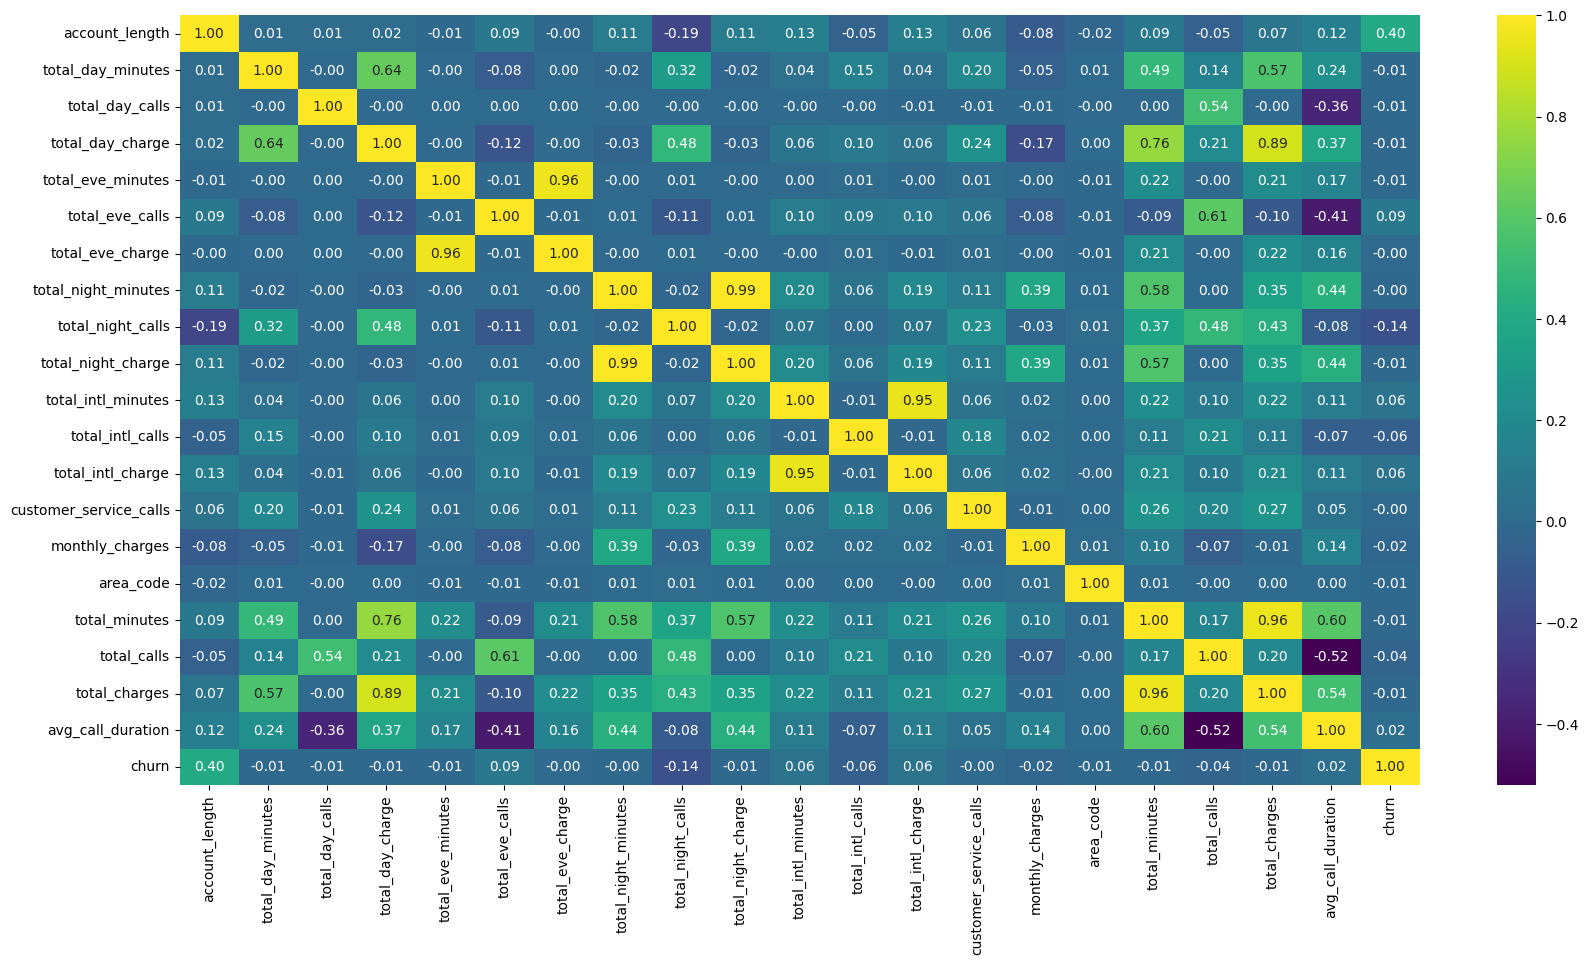

In [248]:
plt.figure(figsize=(20,10))
sns.heatmap(df_imputed.select_dtypes(["int","float"]).corr(),cmap="viridis",fmt=".2f",annot=True)

In [249]:
df_imputed.select_dtypes(["int","float"]).describe()

,account_length,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,...,total_intl_calls,total_intl_charge,customer_service_calls,monthly_charges,area_code,total_minutes,total_calls,total_charges,avg_call_duration,churn
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,...,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.00000,25000.000000,25000.000000,25000.000000
mean,191.709560,353.605142,50.825000,56.917812,124.326688,46.039600,17.400549,271.329951,44.178600,24.428351,...,12.380728,5.795758,3.256816,79.208815,562.273976,751.905630,153.09468,104.542511,5.440496,0.498960
std,145.394105,417.199070,27.804781,43.009212,72.547109,33.736542,10.594378,191.105469,28.946068,17.324059,...,10.709608,4.401831,2.815032,60.424307,222.380377,321.429243,51.89476,47.773134,3.132648,0.500009
min,0.000000,0.020000,0.000000,-13.230000,0.040000,0.000000,-8.600000,0.000000,0.000000,-5.910000,...,0.000000,-3.010000,0.000000,0.020000,213.000000,35.550000,7.00000,1.390000,0.210000,0.000000
25%,76.000000,132.722500,30.000000,22.570000,68.627500,19.000000,9.350000,117.120000,21.000000,10.580000,...,5.000000,2.390000,1.000000,37.397500,408.000000,516.247500,116.00000,68.687500,3.370000,0.000000
50%,161.000000,286.815000,50.000000,48.505000,119.030000,40.000000,16.710000,240.695000,41.000000,21.645000,...,10.000000,5.015000,3.000000,72.600000,561.200000,716.985000,150.00000,97.980000,4.900000,0.000000
75%,275.000000,493.715000,70.000000,83.192500,173.180000,67.000000,24.570000,392.217500,63.000000,35.450000,...,18.000000,8.430000,5.000000,110.992500,714.000000,950.835000,186.00000,133.560000,6.790000,1.000000
max,933.000000,15700.720000,166.000000,282.940000,457.550000,226.000000,70.800000,1292.810000,185.000000,117.660000,...,149.000000,31.990000,19.000000,1329.500000,949.000000,2455.820000,411.00000,340.090000,67.540000,1.000000


In [250]:
class HandlingOutlier:
    def __init__(self):
        pass

    def box_plot(self,df):
        num_cols = df.shape[1]
        cols = 3
        rows = math.ceil(num_cols / cols)

        plt.figure(figsize=(5 * cols, 4 * rows))

        for i, column in enumerate(df.columns, 1):
            plt.subplot(rows, cols, i)
            sns.boxplot(data=df, x=column)
            plt.title(f"Boxplot of {column}")
        plt.tight_layout()
        plt.show()

    def z_index_outlier_detection(self,df,threshold=3):
        temp_df = df.copy()
        numeric_df = temp_df.select_dtypes(include=["int", "float"])
        z_scores = np.abs((numeric_df - numeric_df.mean()) / numeric_df.std())
        mask = (z_scores < threshold).all(axis=1)
        cleaned_df = temp_df[mask].reset_index(drop=True)
        return cleaned_df
            
        

In [251]:
h1 = HandlingOutlier()
df_clean = h1.z_index_outlier_detection(df_imputed)
# h1.box_plot(df_imputed)


In [252]:
df_clean

,state,international_plan,voice_mail_plan,customer_segment,account_length,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,...,total_intl_calls,total_intl_charge,customer_service_calls,monthly_charges,area_code,total_minutes,total_calls,total_charges,avg_call_duration,churn
0,MO,no,no,high_maintenance,146.0,1022.91,62.0,176.38,11.67,98.0,...,40.0,0.69,4.0,65.830,213.0,1087.58,253.0,183.66,4.28,0.0
1,FL,yes,yes,high_maintenance,91.0,469.73,11.0,79.16,148.48,48.0,...,16.0,2.60,4.0,15.740,408.0,958.07,83.0,132.39,11.41,0.0
2,MO,no,yes,regular,309.0,132.32,7.0,25.73,185.93,22.0,...,6.0,12.14,2.0,58.040,408.0,630.84,53.0,88.22,11.68,1.0
3,IL,no,yes,high_value,268.0,97.21,8.0,24.14,100.57,5.0,...,10.0,13.93,0.0,147.010,424.0,524.83,70.0,80.39,7.39,0.0
4,AZ,no,yes,regular,14.0,131.57,60.0,21.20,77.36,132.0,...,9.0,10.31,2.0,59.060,408.0,282.68,236.0,47.43,1.19,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22909,AZ,no,no,high_value,270.0,356.98,30.0,55.78,186.77,78.0,...,2.0,12.48,7.0,159.870,925.0,650.08,186.0,102.03,3.48,1.0
22910,NY,no,no,high_value,85.0,129.78,23.0,24.69,149.06,13.0,...,1.0,3.86,0.0,74.874,415.0,537.12,70.0,64.50,7.57,0.0
22911,NC,no,yes,regular,420.0,229.97,21.0,36.07,200.22,32.0,...,14.0,0.35,0.0,22.980,310.0,459.41,85.0,66.53,5.34,0.0
22912,OH,no,no,high_maintenance,99.0,772.41,61.0,134.43,226.79,48.0,...,15.0,13.39,4.0,14.260,818.0,1473.20,236.0,220.51,6.22,1.0


In [253]:
df_clean["customer_segment"].value_counts()

customer_segment
high_value          9497
regular             8210
high_maintenance    5157
low_usage             50
Name: count, dtype: int64

Steps to take 
1) lets break the dataframe into X and Y . 
2) work with X --> create a pipeline for categorical columns and numerical columns 
3) encode categorical columns, --> ordinal and one-hot , feature scale using standard scaling and min-max (we will test both of them), for numerical cols 
4) we will use random forest algorithm for churn prediction, and we will also use both gridSearchCV and randomizedSearchCV for hyperparam tuning
5) we will look at the accuracy score, MSE, confusion matrix and scores. Thank you ! 

In [254]:
X = df_clean.iloc[:,:-1]
y = df_clean["churn"]

In [255]:
numerical_cols = X.iloc[:,4:].columns.tolist()
one_hot_cols = X[["state","international_plan","voice_mail_plan"]].columns.tolist()
ordinal_cols = X[["customer_segment"]].columns.tolist()
customer_segment_label = [["high_maintenance","high_value","regular","low_usage"]]




In [256]:
print(numerical_cols)
print(one_hot_cols)
print(ordinal_cols)
print(customer_segment_label)

['account_length', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'customer_service_calls', 'monthly_charges', 'area_code', 'total_minutes', 'total_calls', 'total_charges', 'avg_call_duration']
['state', 'international_plan', 'voice_mail_plan']
['customer_segment']
[['high_maintenance', 'high_value', 'regular', 'low_usage']]


In [257]:
standard_scale_pipeline = Pipeline(
    steps=[
        ("standard Scaling",StandardScaler())
    ]
)

In [258]:
min_max_scale_pipeline = Pipeline(
    steps=[
        ("Min max scaling",MinMaxScaler())
    ]
)

In [259]:
ordinal_pipeline = Pipeline(
    steps=[
        ("Ordinal Encoding",OrdinalEncoder(categories=customer_segment_label))
    ]
)

In [260]:
one_hot_pipeline = Pipeline(
    steps=[
        ("One Hot Pipeline",OneHotEncoder(handle_unknown="ignore",sparse_output=False,drop="first"))
    ]
)

In [261]:
standard_scaling_preprocessor = ColumnTransformer(
    transformers=[
        ("standard_scaling_ppl",standard_scale_pipeline,numerical_cols),
        ("ordinal_ppl",ordinal_pipeline,ordinal_cols),
        ("one_hot_ppl",one_hot_pipeline,one_hot_cols),
    ],
    remainder="passthrough",
    n_jobs=-1
)

In [262]:
standard_grid_pipe = Pipeline([
    ("standard_grid_pipe", standard_scaling_preprocessor),
    ("randomForest_classifier",RandomForestClassifier(random_state=42)) 
])

In [263]:
standard_grid_pipe

Pipeline(steps=[('standard_grid_pipe',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('standard_scaling_ppl',
                                                  Pipeline(steps=[('standard '
                                                                   'Scaling',
                                                                   StandardScaler())]),
                                                  ['account_length',
                                                   'total_day_minutes',
                                                   'total_day_calls',
                                                   'total_day_charge',
                                                   'total_eve_minutes',
                                                   'total_eve_calls',
                                                   'total_eve_charge',
                                                   'total_night_minutes',
                                                   'total_nigh...
                                                                   OrdinalEncoder(categories=[['high_maintenance',
                                                                                               'high_value',
                                                                                               'regular',
                                                                                               'low_usage']]))]),
                                                  ['customer_segment']),
                                                 ('one_hot_ppl',
                                                  Pipeline(steps=[('One Hot '
                                                                   'Pipeline',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['state',
                                                   'international_plan',
                                                   'voice_mail_plan'])])),
                ('randomForest_classifier',
                 RandomForestClassifier(random_state=42))])

In [264]:
param_grid = { 
    'randomForest_classifier__n_estimators': [100, 200],
    # 'randomForest_classifier__max_features': ['sqrt', 'log2'],  # Removed 'auto'
    'randomForest_classifier__max_depth': [4, 5],
    # 'randomForest_classifier__criterion': ['gini', 'entropy']
}


In [265]:
gridcv_result = GridSearchCV(standard_grid_pipe,param_grid, cv=2, scoring='accuracy')

In [267]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [268]:
gridcv_result.fit(X_train,y_train)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('standard_grid_pipe',
                                        ColumnTransformer(n_jobs=-1,
                                                          remainder='passthrough',
                                                          transformers=[('standard_scaling_ppl',
                                                                         Pipeline(steps=[('standard '
                                                                                          'Scaling',
                                                                                          StandardScaler())]),
                                                                         ['account_length',
                                                                          'total_day_minutes',
                                                                          'total_day_calls',
                                                                          'total_day_charge',
                                                                          'total_eve_minutes',
                                                                          'total_eve_calls',
                                                                          'total_eve_charge',
                                                                          'tota...
                                                                         Pipeline(steps=[('One '
                                                                                          'Hot '
                                                                                          'Pipeline',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['state',
                                                                          'international_plan',
                                                                          'voice_mail_plan'])])),
                                       ('randomForest_classifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'randomForest_classifier__max_depth': [4, 5],
                         'randomForest_classifier__n_estimators': [100, 200]},
             scoring='accuracy')

In [274]:
gridcv_result.score(X_train,y_train),gridcv_result.score(X_test,y_test)

(0.7162729801974796, 0.6936504473052586)

In [277]:
gridcv_result.best_params_

{'randomForest_classifier__max_depth': 5,
 'randomForest_classifier__n_estimators': 200}

now for min max scaler 

In [273]:
minmax_scaling_preprocessor = ColumnTransformer(
    transformers=[
        ("minmax_ppl",min_max_scale_pipeline,numerical_cols),
        ("ordinal_ppl",ordinal_pipeline,ordinal_cols),
        ("one_hot_ppl",one_hot_pipeline,one_hot_cols),
    ],
    remainder="passthrough",
    n_jobs=-1
)

In [278]:
minmax_ppl = Pipeline([
    ("minmaxprep",minmax_scaling_preprocessor),
    ("randomForestclassifier",RandomForestClassifier(random_state=42))
])

In [280]:
minmax_ppl

Pipeline(steps=[('minmaxprep',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('minmax_ppl',
                                                  Pipeline(steps=[('Min max '
                                                                   'scaling',
                                                                   MinMaxScaler())]),
                                                  ['account_length',
                                                   'total_day_minutes',
                                                   'total_day_calls',
                                                   'total_day_charge',
                                                   'total_eve_minutes',
                                                   'total_eve_calls',
                                                   'total_eve_charge',
                                                   'total_night_minutes',
                                                   'total_night_calls',
                                                   'total_night_...
                                                                   OrdinalEncoder(categories=[['high_maintenance',
                                                                                               'high_value',
                                                                                               'regular',
                                                                                               'low_usage']]))]),
                                                  ['customer_segment']),
                                                 ('one_hot_ppl',
                                                  Pipeline(steps=[('One Hot '
                                                                   'Pipeline',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['state',
                                                   'international_plan',
                                                   'voice_mail_plan'])])),
                ('randomForestclassifier',
                 RandomForestClassifier(random_state=42))])

In [284]:
param_grid = { 
    'randomForestclassifier__n_estimators': [100, 200],
    # 'randomForest_classifier__max_features': ['sqrt', 'log2'],  # Removed 'auto'
    'randomForestclassifier__max_depth': [4, 5],
    # 'randomForest_classifier__criterion': ['gini', 'entropy']
}


In [285]:
minmax_gridCV = GridSearchCV(minmax_ppl,param_grid,cv=2,scoring="accuracy")

In [286]:
minmax_gridCV.fit(X_train,y_train)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('minmaxprep',
                                        ColumnTransformer(n_jobs=-1,
                                                          remainder='passthrough',
                                                          transformers=[('minmax_ppl',
                                                                         Pipeline(steps=[('Min '
                                                                                          'max '
                                                                                          'scaling',
                                                                                          MinMaxScaler())]),
                                                                         ['account_length',
                                                                          'total_day_minutes',
                                                                          'total_day_calls',
                                                                          'total_day_charge',
                                                                          'total_eve_minutes',
                                                                          'total_eve_calls',
                                                                          'total_eve_charge',
                                                                          'total_night_minutes',
                                                                          'to...
                                                                         Pipeline(steps=[('One '
                                                                                          'Hot '
                                                                                          'Pipeline',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['state',
                                                                          'international_plan',
                                                                          'voice_mail_plan'])])),
                                       ('randomForestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'randomForestclassifier__max_depth': [4, 5],
                         'randomForestclassifier__n_estimators': [100, 200]},
             scoring='accuracy')

In [291]:
minmax_gridCV.score(X_train,y_train),minmax_gridCV.score(X_test,y_test)

(0.7162729801974796, 0.6936504473052586)

In [298]:
minmax_pred = minmax_gridCV.predict(X_test)

In [ ]:
minmax_gridCV.best_params_

{'randomForestclassifier__max_depth': 5,
 'randomForestclassifier__n_estimators': 200}

In [293]:
accuracy_score(minmax_pred,y_test)

0.6936504473052586

<Axes: >

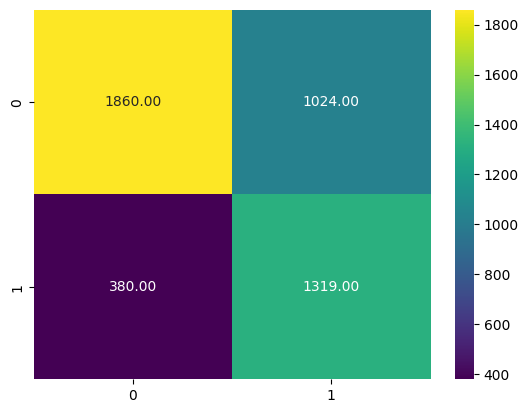

In [296]:
sns.heatmap(confusion_matrix(minmax_pred,y_test),cmap="viridis",fmt='.2f',annot=True)

In [297]:
mean_squared_error(minmax_pred,y_test)

0.30634955269474146

In [302]:
joblib.dump(minmax_gridCV,"minmax_pipeline_using_gridcv.joblib")
joblib.dump(gridcv_result,"gridsearchcv_pipeline_using_gridcv.joblib")

['gridsearchcv_pipeline_using_gridcv.joblib']